# Hands-on Activity 1.3 | Transportation using Graphs

#### Objective(s):

This activity aims to demonstrate how to solve transportation related problem using Graphs

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to compute the shortest path from source to destination using graphs
* Apply DFS and BFS to compute the shortest path

#### Resources:
* Jupyter Notebook

#### Procedures:

1. Create a Node class

In [44]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

2. Create an Edge class

In [45]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

3. Create Digraph class that add nodes and edges

In [46]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

4. Create a Graph class from Digraph class that deifnes the destination and Source

In [47]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

5. Create a buildCityGraph method to add nodes (City) and edges   (source to destination)

In [48]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Boston', 'Providence', 'New York', 'Chicago', 'Denver', 'Phoenix', 'Los Angeles'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g

In [49]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

6. Create a method to define DFS technique

In [50]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

7. Define a shortestPath method to return the shortest path from source to destination using DFS

In [51]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

8. Create a method to test the shortest path method

In [52]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

9. Execute the testSP method

In [53]:
testSP('Boston', 'Phoenix')

Current DFS path: Boston
Current DFS path: Boston->Providence
Already visited Boston
Current DFS path: Boston->Providence->New York
Current DFS path: Boston->Providence->New York->Chicago
Current DFS path: Boston->Providence->New York->Chicago->Denver
Current DFS path: Boston->Providence->New York->Chicago->Denver->Phoenix
Already visited New York
Current DFS path: Boston->New York
Current DFS path: Boston->New York->Chicago
Current DFS path: Boston->New York->Chicago->Denver
Current DFS path: Boston->New York->Chicago->Denver->Phoenix
Already visited New York
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


##### Question:
    
Describe the DFS method to compute for the shortest path using the given sample codes

#type your answer here
## - For Starters, DFS Search provided a search by applying the concept of stacks (LIFO). It was focused in assuring the focus of the search by each of the subtrees.

## - For futher explaination (as of my knowldege):
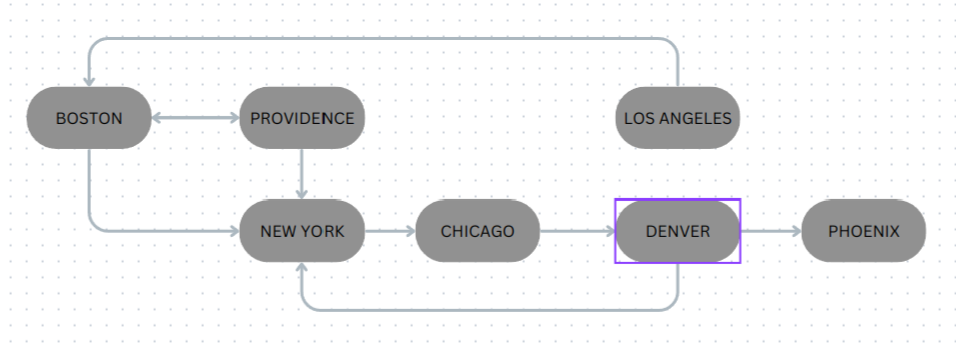

## In the sample code presented, It is a directed that consists of the possible paths of the places you want to go. By pursuing Depth-First Search, you are searching by the places and once you are there, the only focus of your search is the places connected to that place.

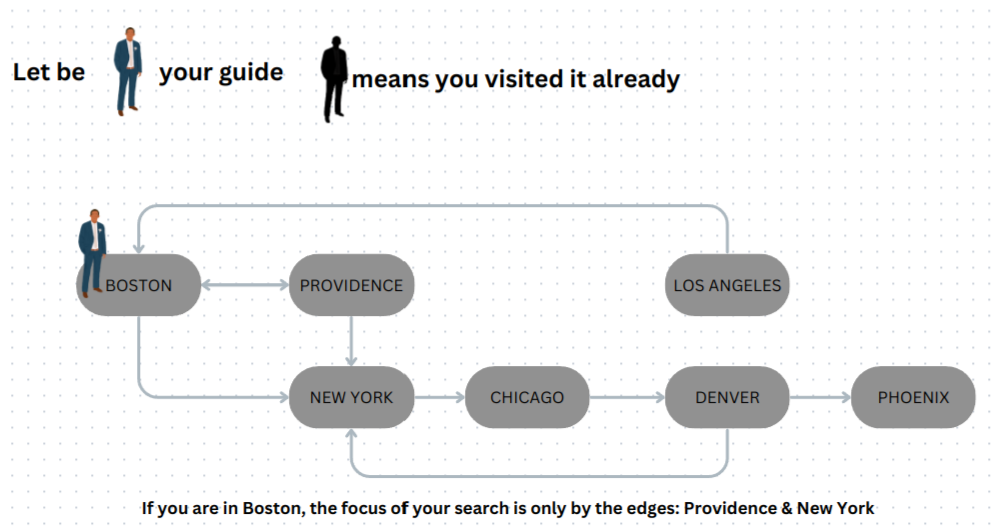


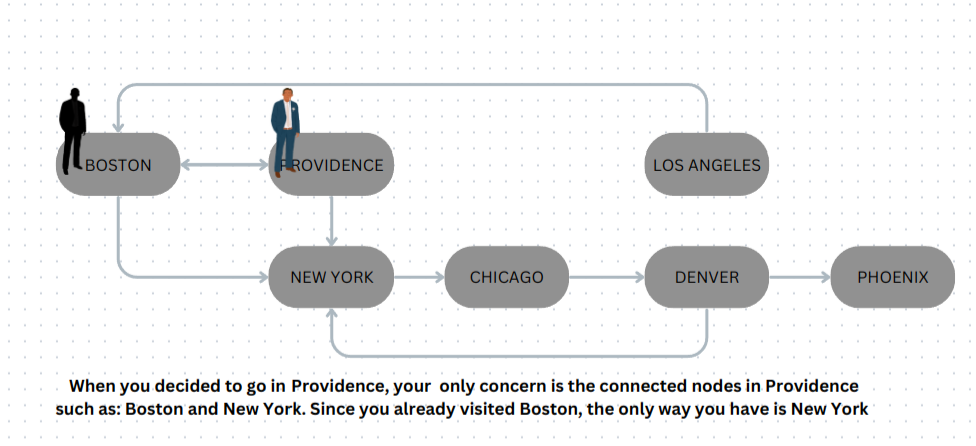


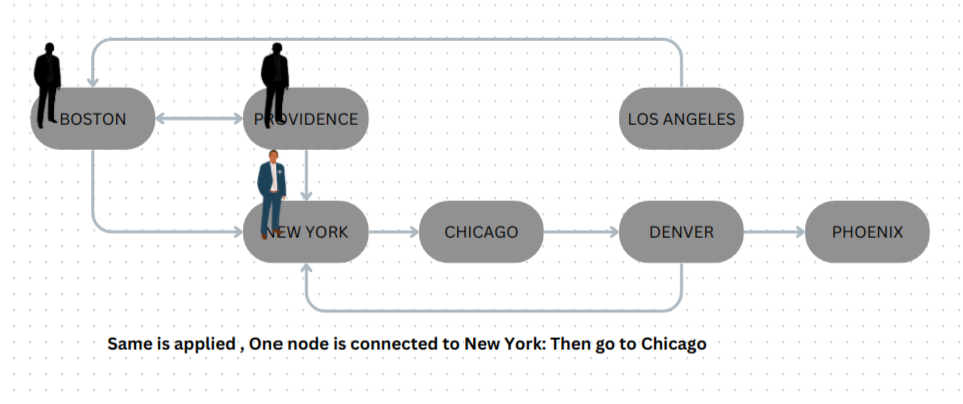

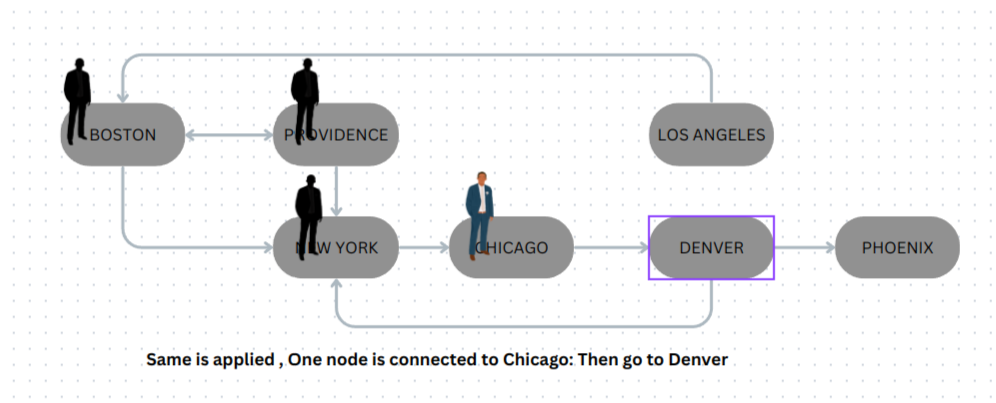

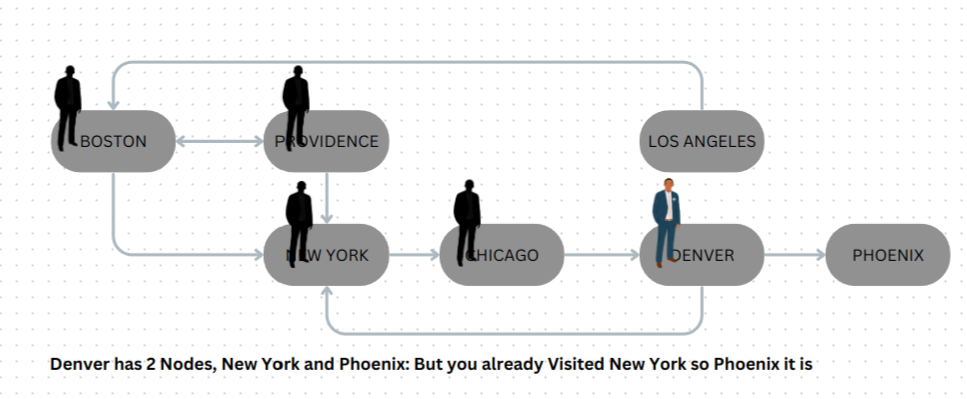

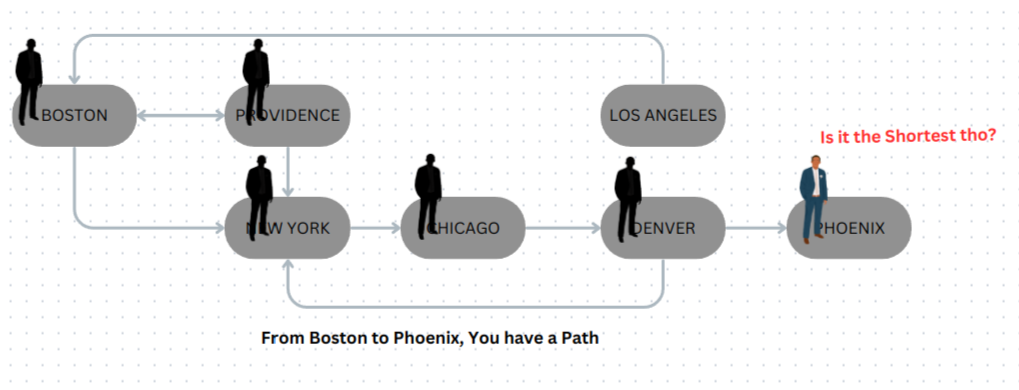


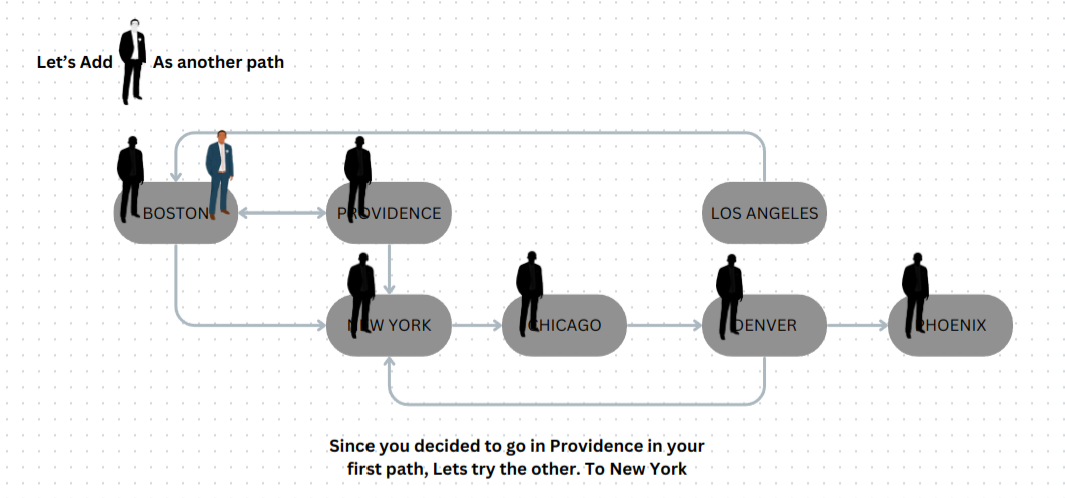

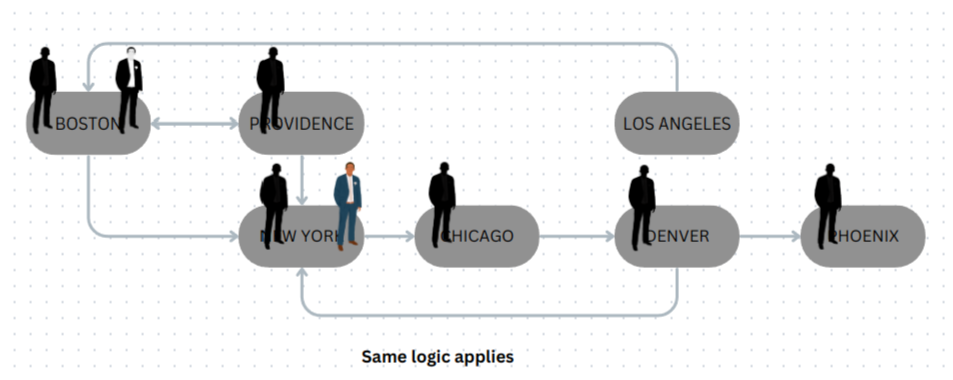

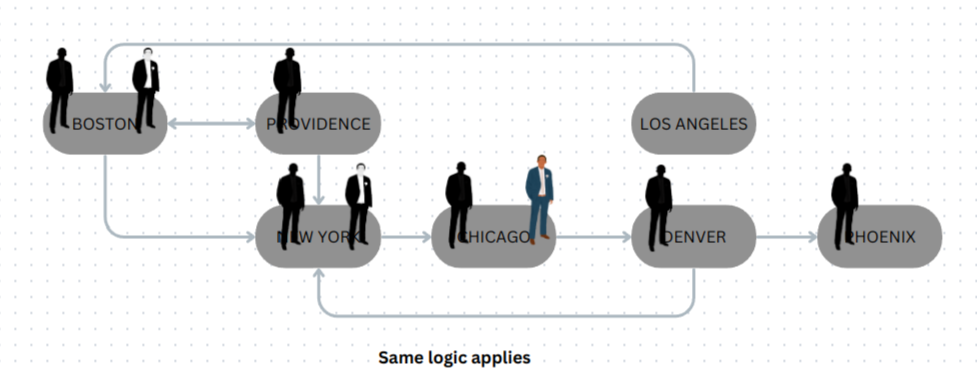

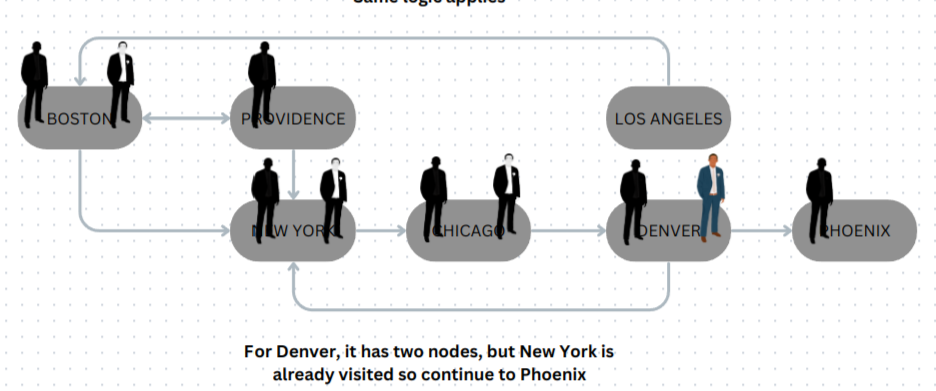

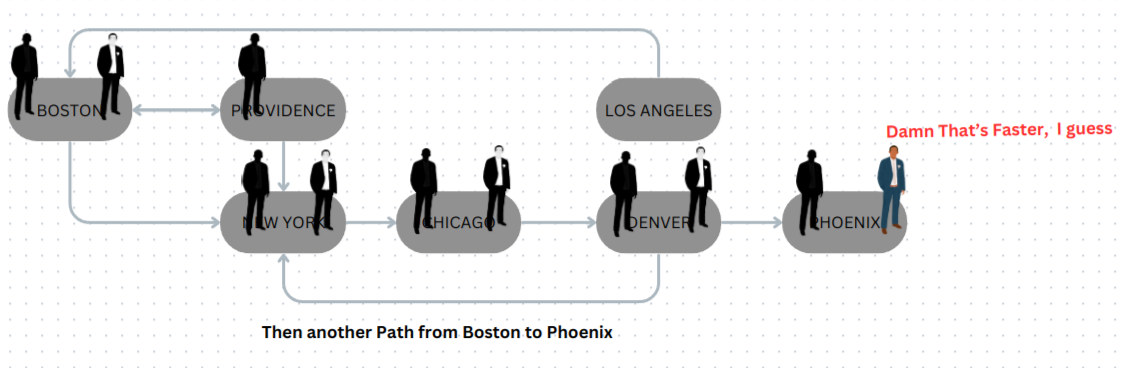


## KEYTAKEAWAYS IN DFS:
## - You need to focus in the current Node you are in
## - The Last node You enter will be your first priority until all nodes are visited.


10. Create a method to define BFS technique

In [54]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

11. Define a shortestPath method to return the shortest path from source to destination using DFS

In [55]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

12. Execute the testSP method

In [56]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


#### Question:
    
Describe the BFS method to compute for the shortest path using the given sample codestion:
    

## - BFS Focuses in getting all the adjacent nodes of the current node youe in. As it incorporate FIFO method (stand as a Queue). It is simple and seems the same to the level order traversals of a binary tree.

## - To futher explain BFS,
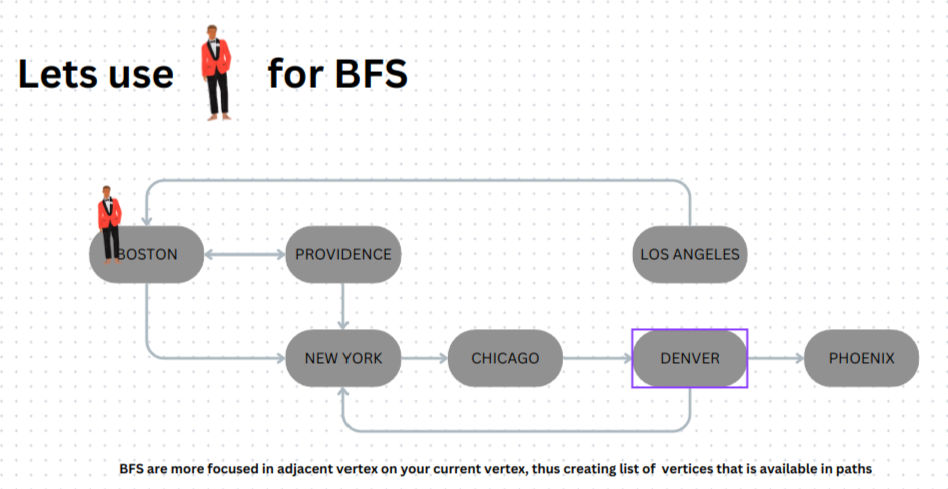

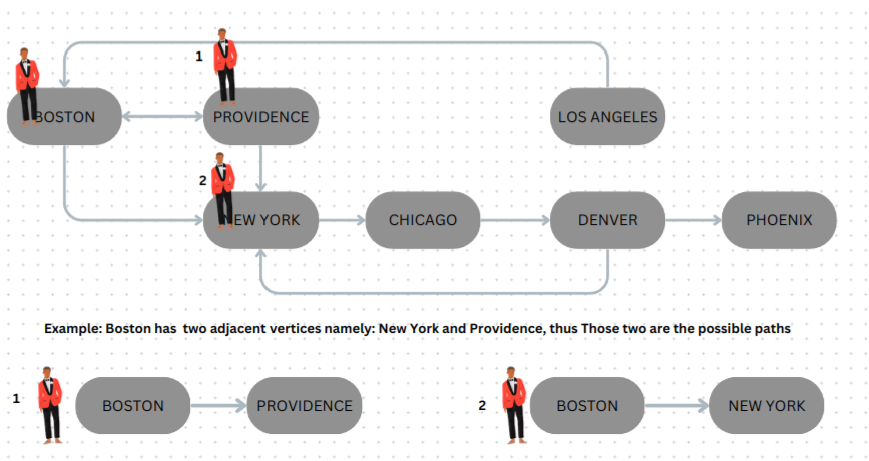

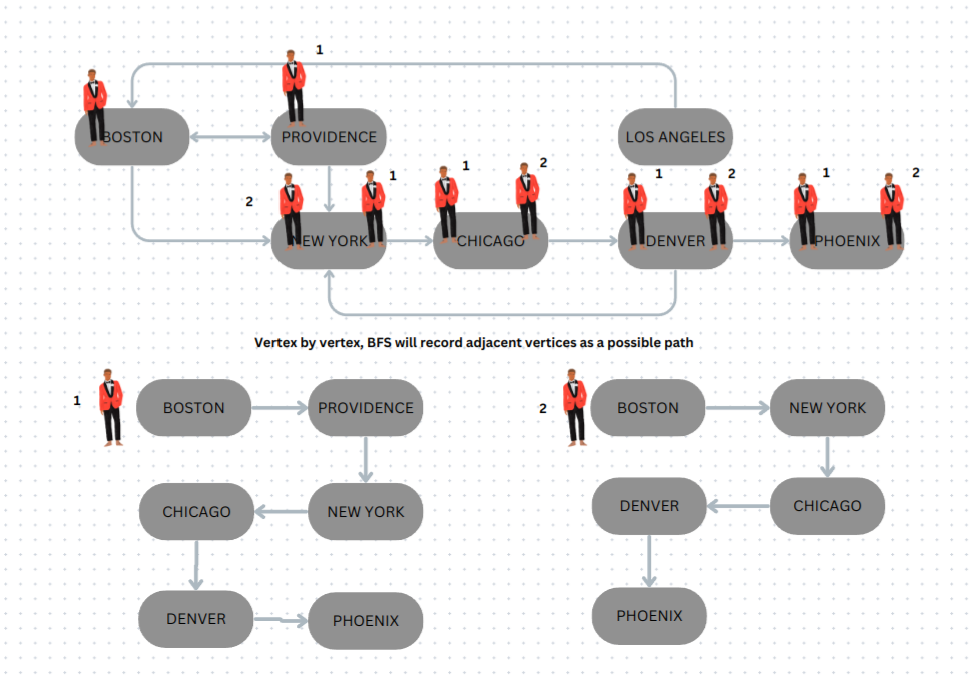

## KEY TAKEAWAYS IN BFS:
## - TAKES ALL THE VERTEX' ADJACENT EDGES BY A QUEUE MANNER.

#### Supplementary Activitiy
* Use a specific location or city to solve transportation using graph
* Use DFS and BFS methods to compute the shortest path
* Display the shortest path from source to destination using DFS and BFS
* Differentiate the performance of DFS from BFS

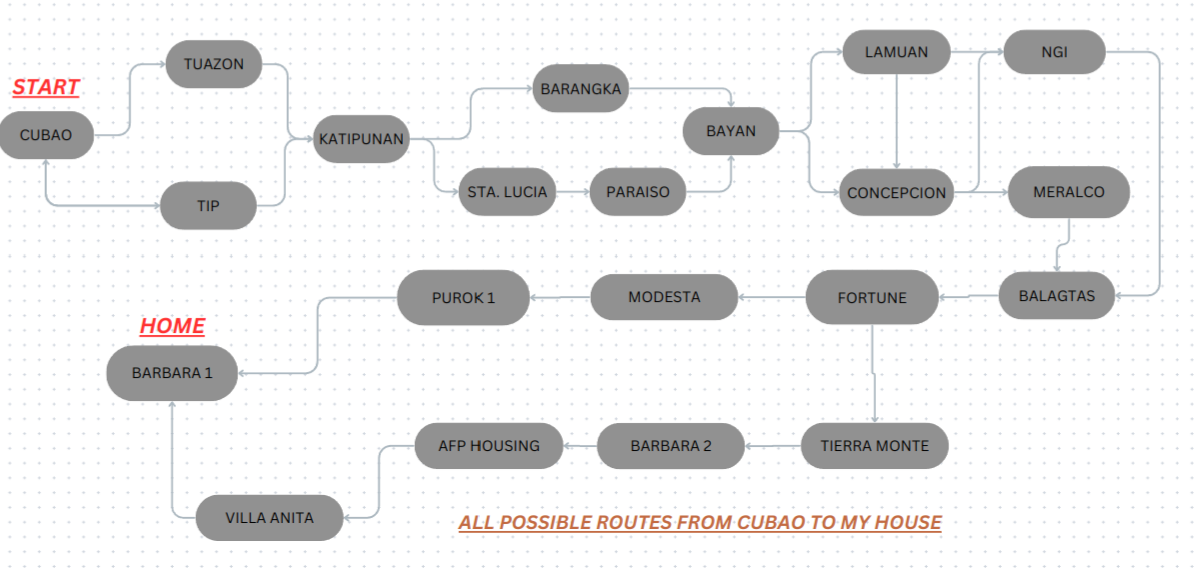

# - This List represents the Routes name:

In [57]:
routes = ["Cubao", "Tuazon", "TIP", "Katipunan", "Barangka", "Sta. Lucia", "Paraiso", "Bayan", "Lamuan", "Concepcion", "NGI", "Meralco", "Balagtas", "Fortune", "Tierra Monte", "Modesta", "Barbara 2", "Purok 1", "Villa Anita", "AFP Housing", "Barbara 1"]

# - Using the Code sample, I build a Directional Graph of Routes

In [58]:
def buildRouteGraph(graphType):
    g = graphType()
    for name in routes:
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Cubao'), g.getNode('Tuazon')))
    g.addEdge(Edge(g.getNode('Cubao'), g.getNode('TIP')))
    g.addEdge(Edge(g.getNode('TIP'), g.getNode('Cubao')))
    g.addEdge(Edge(g.getNode('Tuazon'), g.getNode('Katipunan')))
    g.addEdge(Edge(g.getNode('Katipunan'), g.getNode('Barangka')))
    g.addEdge(Edge(g.getNode('Katipunan'), g.getNode('Sta. Lucia')))
    g.addEdge(Edge(g.getNode('Barangka'), g.getNode('Bayan')))
    g.addEdge(Edge(g.getNode('Sta. Lucia'), g.getNode('Paraiso')))
    g.addEdge(Edge(g.getNode('Paraiso'), g.getNode('Bayan')))
    g.addEdge(Edge(g.getNode('Bayan'), g.getNode('Lamuan')))
    g.addEdge(Edge(g.getNode('Bayan'), g.getNode('Concepcion')))
    g.addEdge(Edge(g.getNode('Lamuan'), g.getNode('Concepcion')))
    g.addEdge(Edge(g.getNode('Lamuan'), g.getNode('NGI')))
    g.addEdge(Edge(g.getNode('Concepcion'), g.getNode('NGI')))
    g.addEdge(Edge(g.getNode('Concepcion'), g.getNode('Meralco')))
    g.addEdge(Edge(g.getNode('NGI'), g.getNode('Balagtas')))
    g.addEdge(Edge(g.getNode('Meralco'), g.getNode('Balagtas')))
    g.addEdge(Edge(g.getNode('Balagtas'), g.getNode('Fortune')))
    g.addEdge(Edge(g.getNode('Fortune'), g.getNode('Modesta')))
    g.addEdge(Edge(g.getNode('Modesta'), g.getNode('Purok 1')))
    g.addEdge(Edge(g.getNode('Purok 1'), g.getNode('Barbara 1')))
    g.addEdge(Edge(g.getNode('Fortune'), g.getNode('Tierra Monte')))
    g.addEdge(Edge(g.getNode('Tierra Monte'), g.getNode('Barbara 2')))
    g.addEdge(Edge(g.getNode('Barbara 2'), g.getNode('AFP Housing')))
    g.addEdge(Edge(g.getNode('AFP Housing'), g.getNode('Villa Anita')))
    g.addEdge(Edge(g.getNode('Villa Anita'), g.getNode('Barbara 1')))
    return g

# - DFS Algorithm Provided

In [59]:
# type your code here using DFS
def DFS_(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

In [60]:
def shortestPathDFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS_(graph, start, end, [], None, toPrint)

In [61]:
def testSPDFS(source, destination):
    g = buildRouteGraph(Digraph)
    sp = shortestPathDFS(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

# - Results of the DFS Shortest Path

In [62]:
testSPDFS("Cubao", "Barbara 1")

Current DFS path: Cubao
Current DFS path: Cubao->Tuazon
Current DFS path: Cubao->Tuazon->Katipunan
Current DFS path: Cubao->Tuazon->Katipunan->Barangka
Current DFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan
Current DFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan
Current DFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan->Concepcion
Current DFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan->Concepcion->NGI
Current DFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan->Concepcion->NGI->Balagtas
Current DFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan->Concepcion->NGI->Balagtas->Fortune
Current DFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan->Concepcion->NGI->Balagtas->Fortune->Modesta
Current DFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan->Concepcion->NGI->Balagtas->Fortune->Modesta->Purok 1
Current DFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan->Concepcion->NGI->Balagtas->Fortune->Modesta->Purok 1

# -BFS Provided Algorithm

In [63]:
# type your code here using BFS
def BFS_(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

In [64]:
def shortestPathBFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS_(graph, start, end, toPrint)

In [65]:
def testSPBFS(source, destination):
    g = buildRouteGraph(Digraph)
    sp = shortestPathBFS(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

# - Result of the BFS Shortest Path

In [66]:
testSPBFS("Cubao", "Barbara 1")

Current BFS path: Cubao
Current BFS path: Cubao->Tuazon
Current BFS path: Cubao->TIP
Current BFS path: Cubao->Tuazon->Katipunan
Current BFS path: Cubao->Tuazon->Katipunan->Barangka
Current BFS path: Cubao->Tuazon->Katipunan->Sta. Lucia
Current BFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan
Current BFS path: Cubao->Tuazon->Katipunan->Sta. Lucia->Paraiso
Current BFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan
Current BFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Concepcion
Current BFS path: Cubao->Tuazon->Katipunan->Sta. Lucia->Paraiso->Bayan
Current BFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan->Concepcion
Current BFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Lamuan->NGI
Current BFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Concepcion->NGI
Current BFS path: Cubao->Tuazon->Katipunan->Barangka->Bayan->Concepcion->Meralco
Current BFS path: Cubao->Tuazon->Katipunan->Sta. Lucia->Paraiso->Bayan->Lamuan
Current BFS path: Cubao->Tuazon->Katipu

#Type your evaluation about the performance of DFS and BFS
# - I think the speed of these algorithms differ in the number of nodes since there time Complexity is in O(V + E) or it runs based in the sum of vertex and edges. I think in space complexity DFS beat BFS since the use of Stacks is theoretically more storage effiecient than Queues. But the possible errors here that DFS can be stuck to infinite number of nodes resulting not giveing short path. But this two is good

#### Conclusion

#type your conclusion here
- In Conclusion, DFS searching follows the Stack LIFO method that allowschecking the node and focusing the current nodes' edges creating much deeper graph spanning tree. While BFS take the Queue Route that is focusing the adjacent edges of the current node.

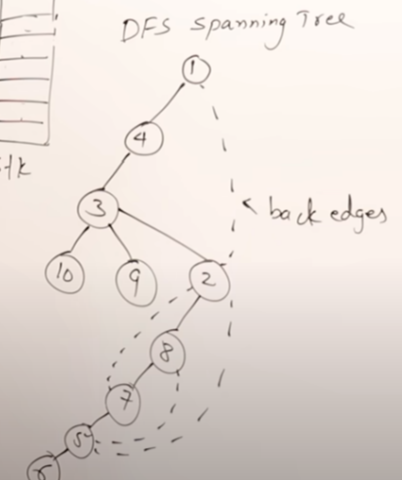

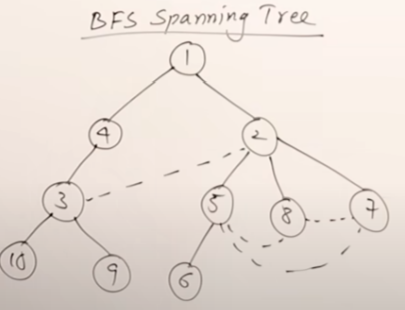

In [67]:
# Kurtymittens (Kurt Russel Villamor)